In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from ingest_data import DataIngestorFactory
from analysis.basic_inspection import DataInspector, DataTypesInspection, SummaryStatistics
from analysis.univariate_analysis import UnivariateAnalyzer, NumericalUnivariate, CategoricalUnivariate

In [3]:
file_path = "/home/shura/Downloads/archive.zip" #Replace with the appropriate path
file_extension= os.path.splitext(file_path)[1]

In [4]:
data_ingestor = DataIngestorFactory.get_data_ingestor(file_extension)
df = data_ingestor.ingest(file_path)

# Data inspection

In [6]:
inspector = DataInspector(DataTypesInspection())
inspector.execute_inspection(df)

n_columns = df.shape[1]
n_rows = df.shape[0]

Data types and null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265324 entries, 0 to 1265323
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1265324 non-null  int64  
 1   title                 1265311 non-null  object 
 2   vote_average          1265324 non-null  float64
 3   vote_count            1265324 non-null  int64  
 4   status                1265324 non-null  object 
 5   release_date          1021529 non-null  object 
 6   revenue               1265324 non-null  int64  
 7   runtime               1265324 non-null  int64  
 8   adult                 1265324 non-null  bool   
 9   backdrop_path         326138 non-null   object 
 10  budget                1265324 non-null  int64  
 11  homepage              132104 non-null   object 
 12  imdb_id               633143 non-null   object 
 13  original_language     1265324 non-null  object 
 14  origin

In [6]:
inspector.set_strategy(SummaryStatistics())
inspector.execute_inspection(df)

Estadísitcas (Numerical Features):
                 id  vote_average    vote_count       revenue       runtime  \
count  1.265324e+06  1.265324e+06  1.265324e+06  1.265324e+06  1.265324e+06   
mean   8.135385e+05  1.714920e+00  1.695457e+01  6.575266e+05  4.591780e+01   
std    4.334219e+05  2.944189e+00  3.019335e+02  1.879263e+07  6.127396e+01   
min    2.000000e+00  0.000000e+00  0.000000e+00 -1.200000e+01 -2.800000e+01   
25%    4.493938e+05  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    8.236995e+05  0.000000e+00  0.000000e+00  0.000000e+00  1.900000e+01   
75%    1.199844e+06  4.000000e+00  1.000000e+00  0.000000e+00  8.700000e+01   
max    1.523440e+06  1.000000e+01  3.449500e+04  5.000000e+09  1.440000e+04   

             budget    popularity  
count  1.265324e+06  1.265324e+06  
mean   2.543624e+05  1.132364e+00  
std    5.190127e+06  7.198566e+00  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  6.000000e-01  
50%    0.000000e+00  6.000000e-01  
7

## Insights

The original dataframe contains 24 columns and 1,265,324 rows.

# Univariate Analysis

## Numerical Features

### Vote average

In [5]:
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariate())

count    1.265324e+06
mean     1.714920e+00
std      2.944189e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.000000e+00
max      1.000000e+01
Name: vote_average, dtype: float64


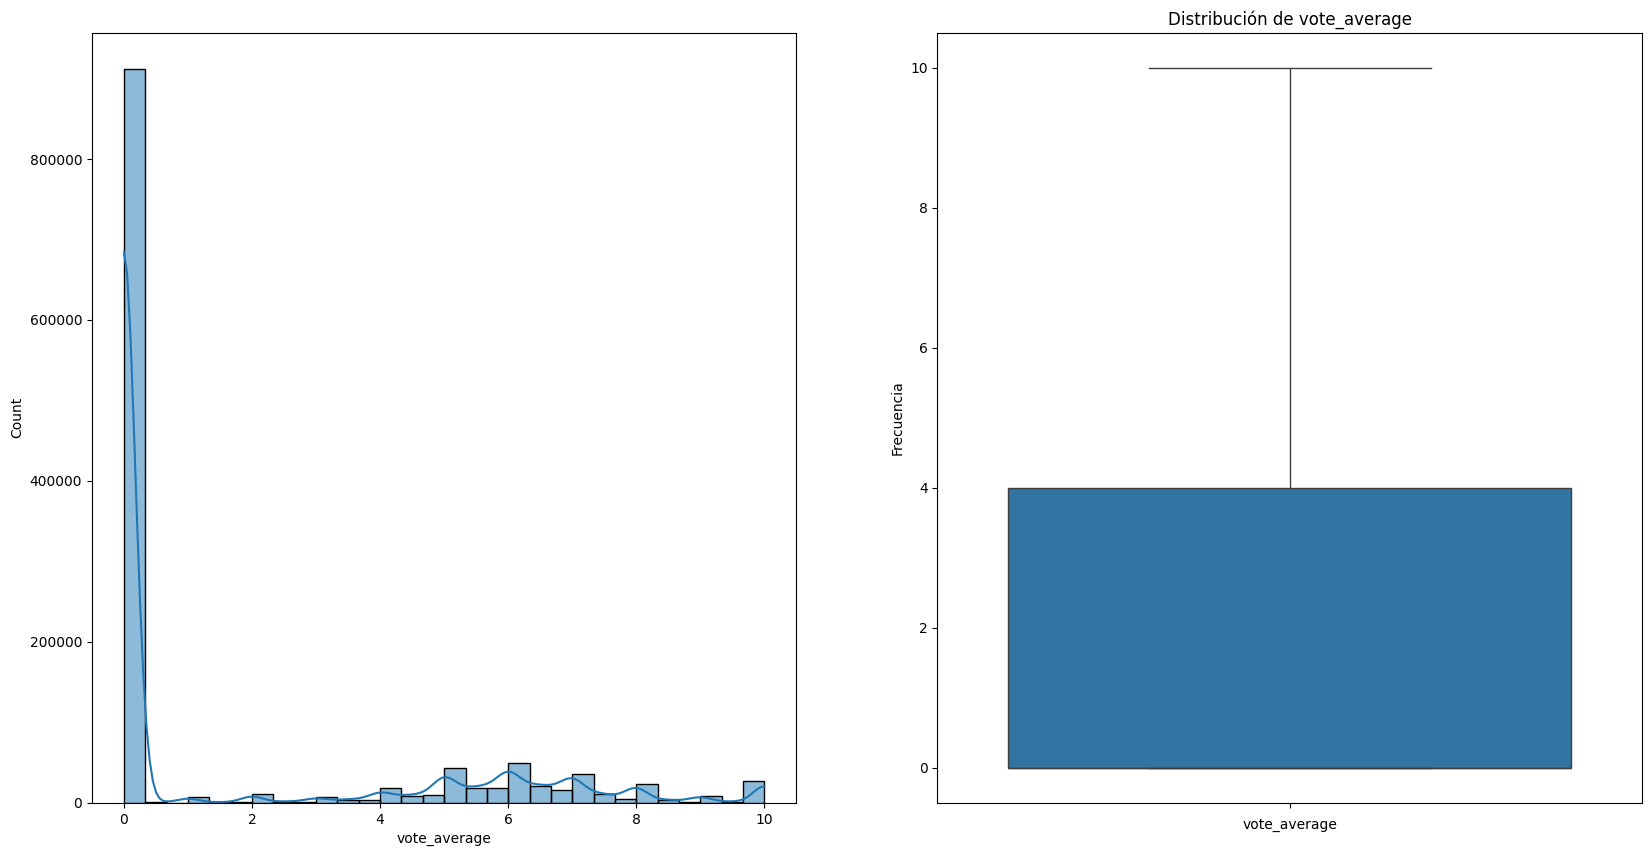

In [7]:
univariate_analyzer.execute_analysis(df, 'vote_average')

In [7]:

print(f"There are {df[df['vote_average']==0].shape[0]} movies with a score of 0.")
print(f"This represents {df[df['vote_average']==0].shape[0]*100/df.shape[0]:.2f}% of the movies.")

There are 911247 movies with a score of 0.
This represents 72.02% of the movies.


#### Insights

The `vote_average` variable has a large number of zero votes. This could indicate that the movie hasn't been released yet, is not well-known, is very old, or there's an error in its scoring.

### Vote count

count    1.265324e+06
mean     1.695457e+01
std      3.019335e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      3.449500e+04
Name: vote_count, dtype: float64


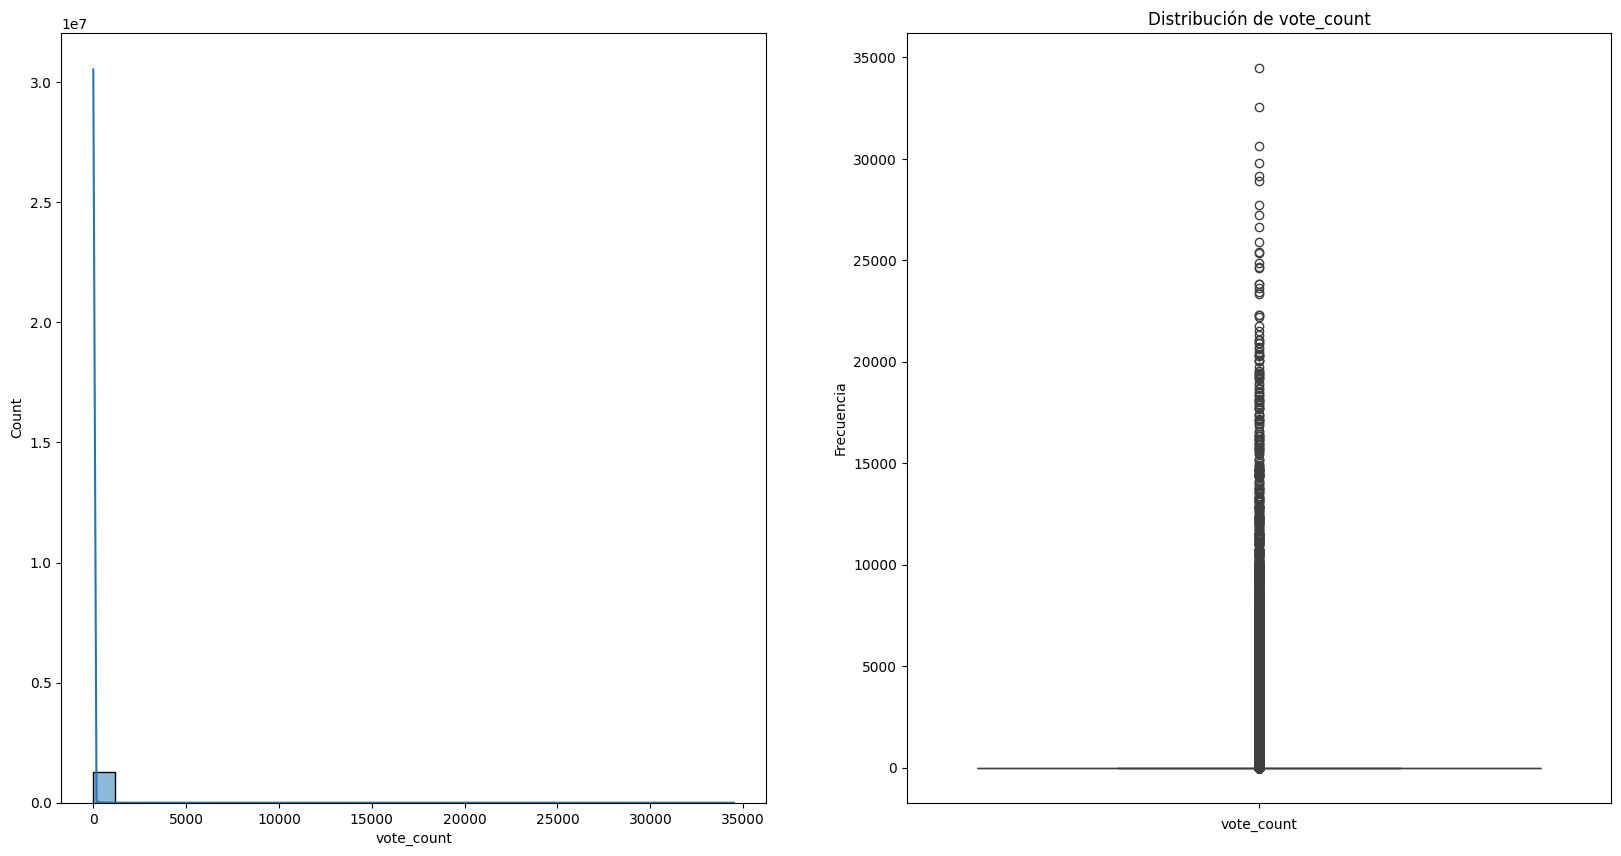

In [8]:
univariate_analyzer.execute_analysis(df, "vote_count")

In [8]:
print(f"There are {df[df['vote_count']==0].shape[0]} movies with 0 votes.")
print(f"This represents {df[df['vote_count']==0].shape[0]*100/df.shape[0]:.2f}% of the movies.")

There are 910996 movies with 0 votes.
This represents 72.00% of the movies.


#### Insights

This distribution is also heavily skewed, and there are many outliers. This is likely because many movies have 0 votes.

**TO-DO:** Remove these movies as they will not be representative in our model.

### Revenue

/home/shura/projects/programming/datascience/talento-tech/.venv/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.265324e+06
mean     6.575266e+05
std      1.879263e+07
min     -1.200000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.000000e+09
Name: revenue, dtype: float64


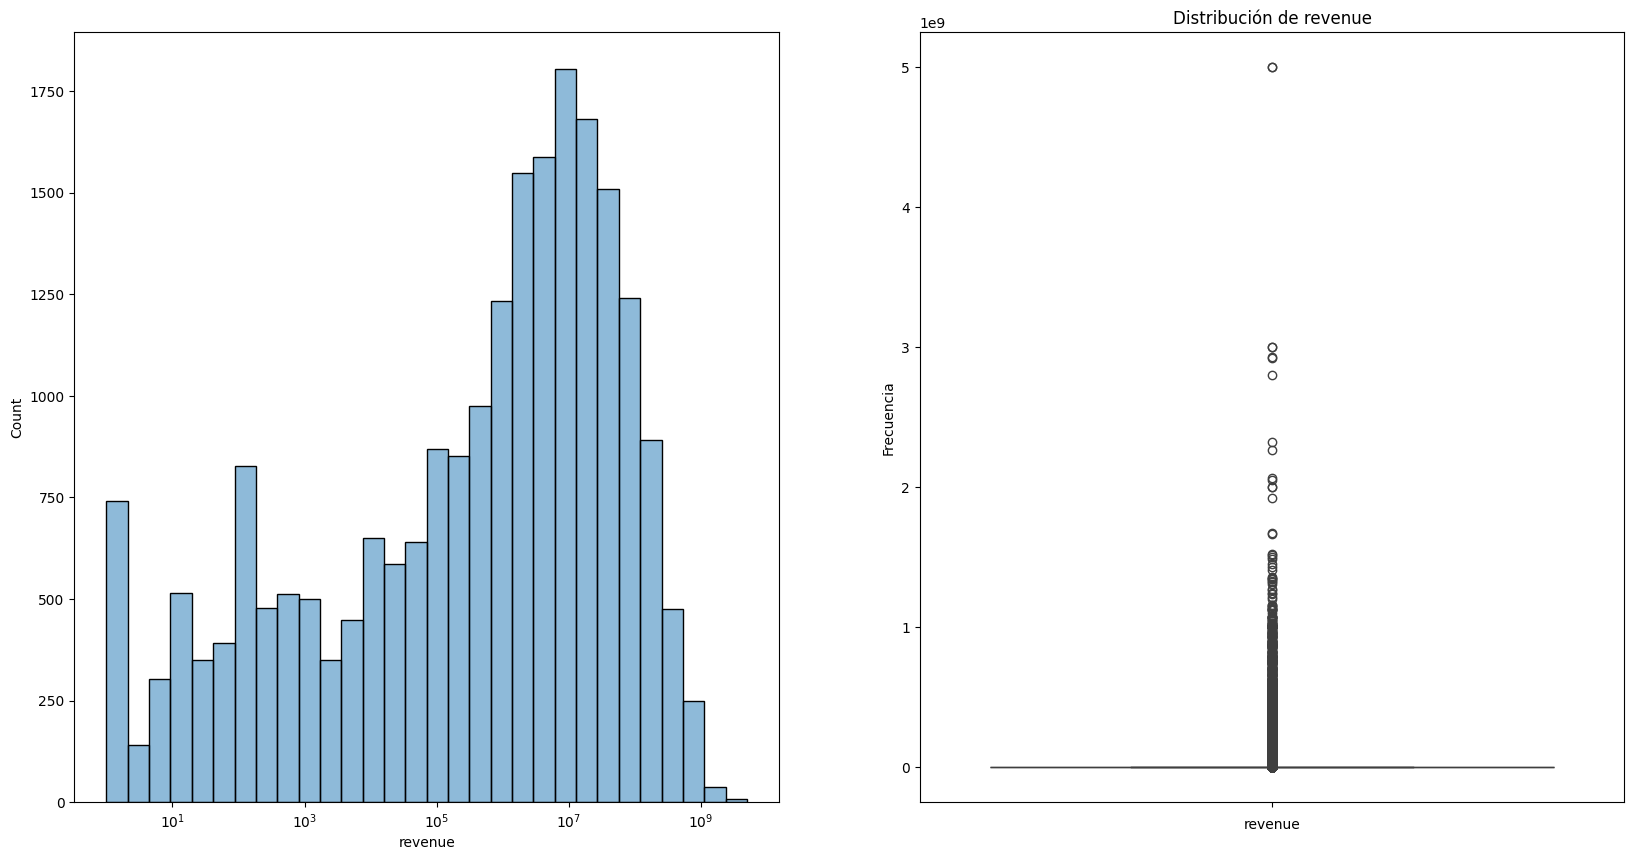

In [24]:
univariate_analyzer.execute_analysis(df, "revenue", log=True)

#### Insights

There is a skew. This indicates that the majority of values are concentrated around a single value. There are also several outliers from very famous movies.

**TO-DO:** The values are very large, so it will probably be useful to work with them in a log scale. This can help to regularize the outliers.

### Runtime

/home/shura/projects/programming/datascience/talento-tech/.venv/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/shura/projects/programming/datascience/talento-tech/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:4671: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    1.265324e+06
mean     4.591780e+01
std      6.127396e+01
min     -2.800000e+01
25%      0.000000e+00
50%      1.900000e+01
75%      8.700000e+01
max      1.440000e+04
Name: runtime, dtype: float64


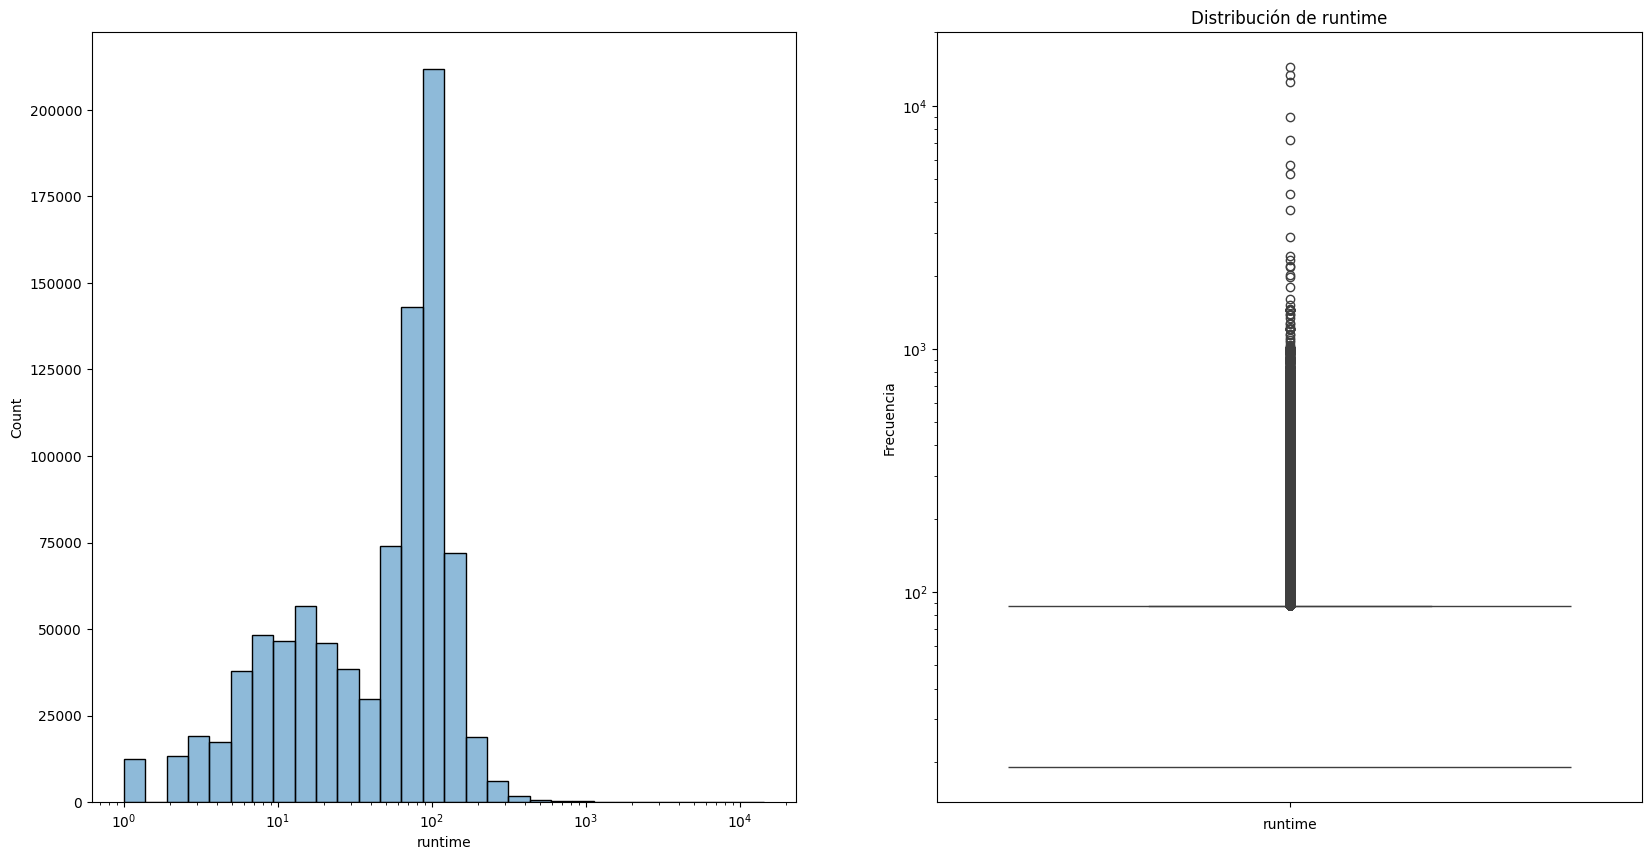

In [10]:
univariate_analyzer.execute_analysis(df, "runtime", log=True)

### Insights

There is a slight skew. There are many outliers below the mean, which may indicate short films. There are also outliers above the mean.

**TO-DO:** Work with these values using a log transformation.

### Budget

/home/shura/projects/programming/datascience/talento-tech/.venv/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/shura/projects/programming/datascience/talento-tech/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:4671: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    1.265324e+06
mean     2.543624e+05
std      5.190127e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+09
Name: budget, dtype: float64


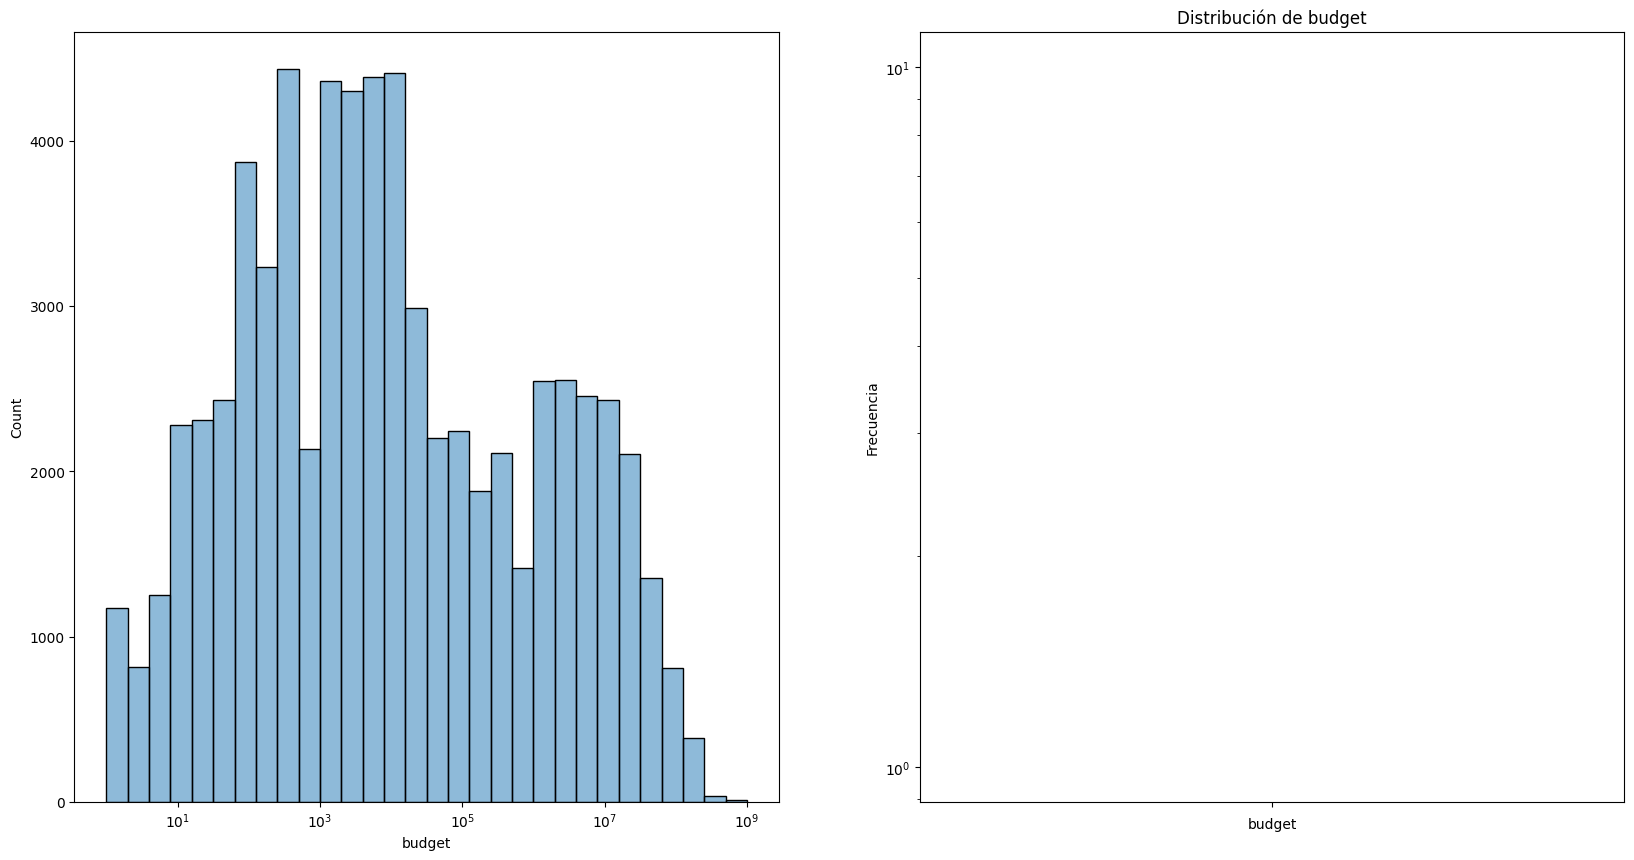

In [13]:
univariate_analyzer.execute_analysis(df, 'budget', log=True)

#### Insights

The distribution looks more normal.

**TO-DO:** To analyze it, we can work with the data on a log scale, since the values are very high.


### Popularity

/home/shura/projects/programming/datascience/talento-tech/.venv/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.265324e+06
mean     1.132364e+00
std      7.198566e+00
min      0.000000e+00
25%      6.000000e-01
50%      6.000000e-01
75%      8.400000e-01
max      2.994357e+03
Name: popularity, dtype: float64


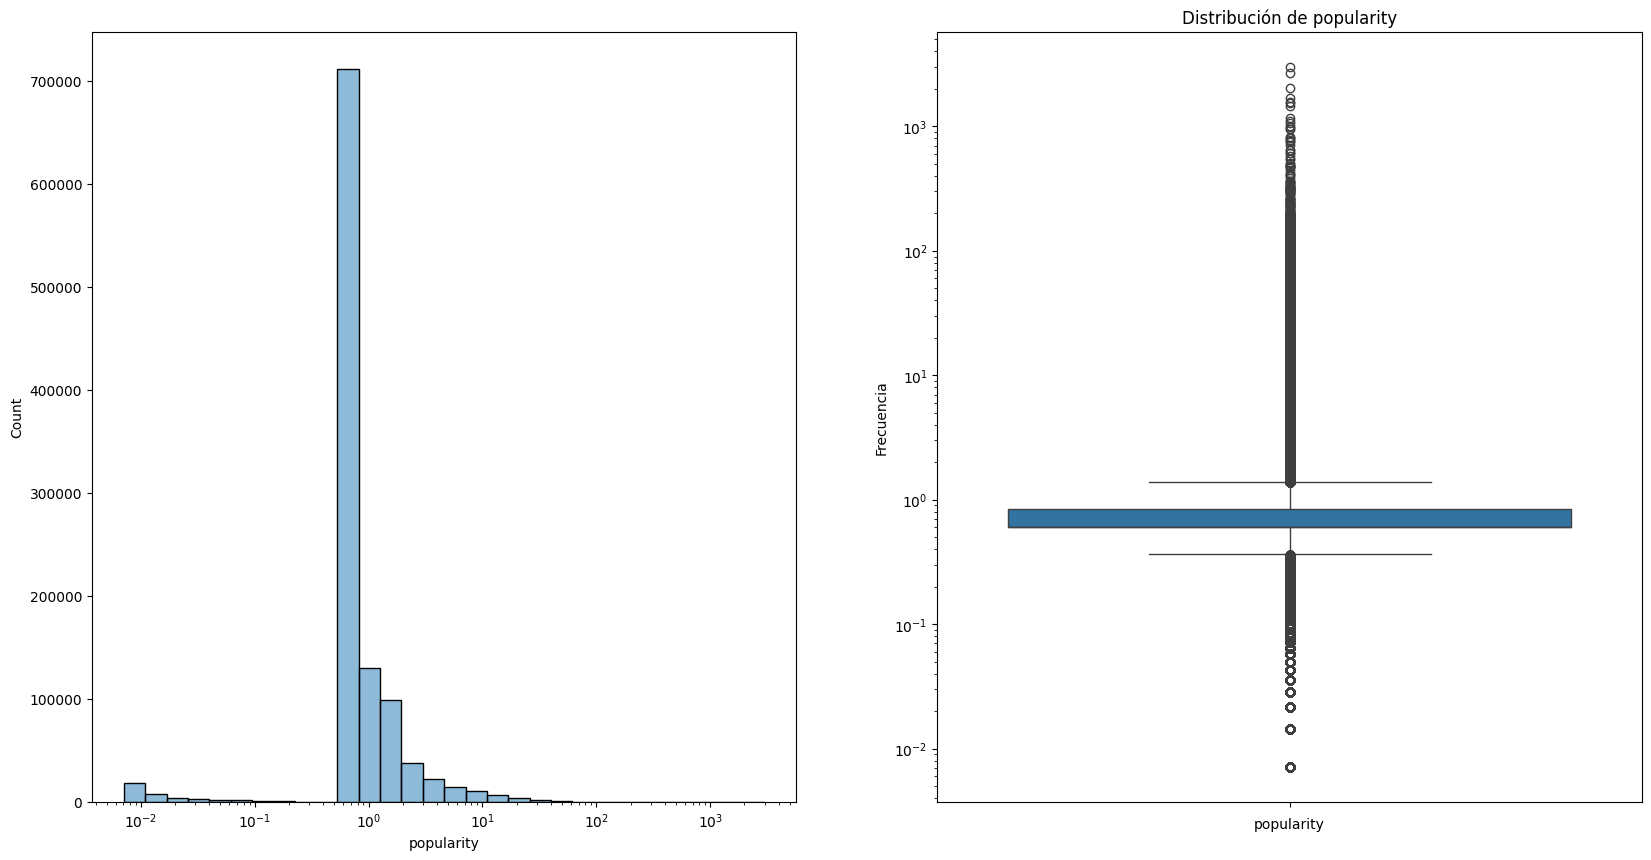

In [16]:
univariate_analyzer.execute_analysis(df, "popularity", log=True)

#### Insights

The vast majority of the data falls within the same range. There are a few decimal value outliers. There are also outliers with high popularity scores, which may indicate extremely famous movies.

**TO-DO:** See how this variable can be related to the score.

In [17]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')

## Categorical Features

### Status

In [6]:
univariate_analyzer.set_strategy(CategoricalUnivariate())

/home/shura/projects/programming/datascience/talento-tech/src/analysis/univariate_analysis.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


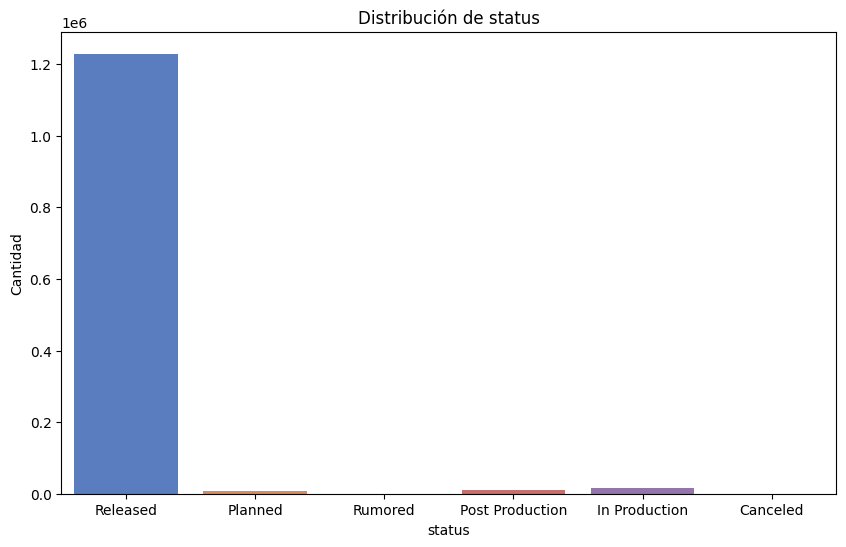

In [8]:
univariate_analyzer.execute_analysis(df, feature="status")

#### Insights

There is a large number of rows with the status set to 'released'.

**TO-DO:** To avoid overfitting with this class, it is best to drop the `status` feature and also remove the movies that do not have this class, as we are only interested in movies that have already been released.

## Adult

/home/shura/projects/programming/datascience/talento-tech/src/analysis/univariate_analysis.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


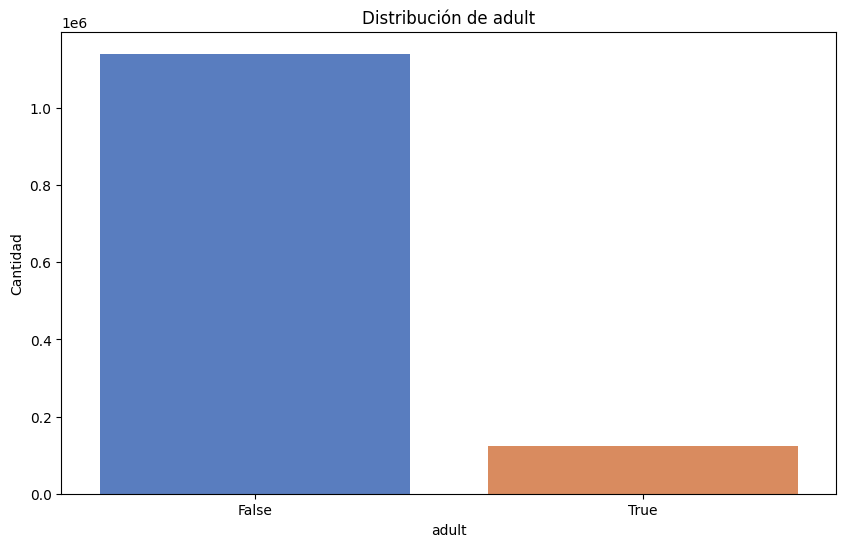

In [9]:
univariate_analyzer.execute_analysis(df, "adult")

#### Insights

Most movies are not for an adult audience only.

**TO-DO:** To avoid overfitting with this class, it is best to remove the adult feature.

## Original Language

In [21]:
top_language = df["original_language"].value_counts()[:20].reset_index()

<Axes: xlabel='original_language', ylabel='count'>

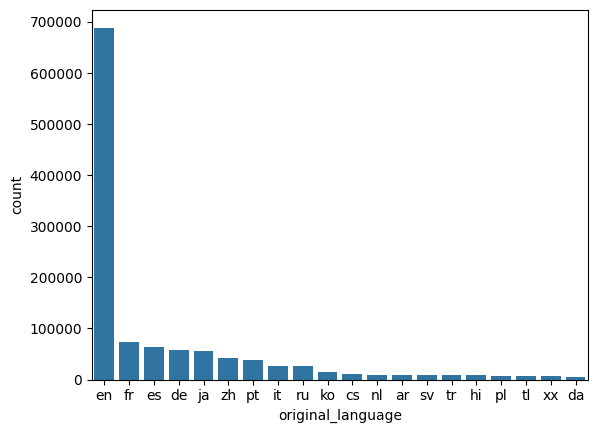

In [29]:
sns.barplot(
    data=top_language,
    y='count',
    x='original_language'
)

#### Insights

The original language is highly imbalanced. The majority of movies are in English.

**TO-DO:** To avoid overfitting, we will remove this feature.

## Genres

In [38]:
print(df['genres'].unique().shape)
print(df['genres'].unique())

(14125,)
['Action, Science Fiction, Adventure' 'Adventure, Drama, Science Fiction'
 'Drama, Action, Crime, Thriller' ...
 'Music, Romance, Comedy, Drama, TV Movie' 'Action, Comedy, Drama, Horror'
 'Horror, Mystery, Drama, Action, Thriller, Fantasy']


#### Insights

There are 14,125 unique values for this feature. It's actually treating the concatenation of several genres as a distinct one.

**TO-DO:** Separate each list of genres to understand the true distribution per genre.

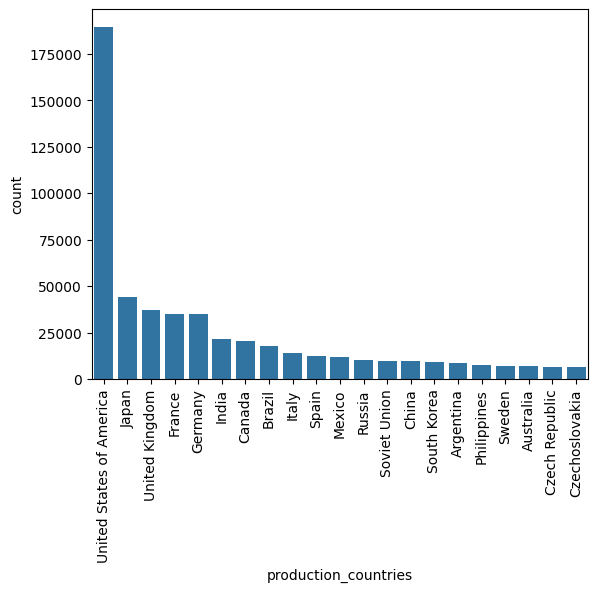

The number of distinct countries is 10504.


In [9]:
top_countries = df["production_countries"].value_counts().reset_index()
sns.barplot(
    data=top_countries.loc[:20],
    y='count',
    x='production_countries'
)

plt.xticks(rotation=90)
plt.show()
print(f"The number of distinct countries is {top_countries.shape[0]}.")

#### Insights

Most movies were made in the USA, so keeping this variable could cause problems in the model.

TO-DO: Remove this feature.

### Spoken Language

In [58]:
print(df['spoken_languages'].unique().shape)
print(df['spoken_languages'].unique())

(7260,)
['English, French, Japanese, Swahili' 'English' 'English, Mandarin' ...
 'Arabic, English, French, Gaelic, Occitan'
 'Hungarian, German, Russian, Slovak' 'Mandarin, French, Wolof']


#### Insights

Here, the same thing happens as with the genres feature. We will omit this from our model, as we believe that the language in which movies are available does not affect a film's quality.

### Production Companies

In [13]:
print(df['production_companies'].unique().shape)
print(df['production_companies'].unique())

(219879,)
['Legendary Pictures, Syncopy, Warner Bros. Pictures'
 'Legendary Pictures, Syncopy, Lynda Obst Productions'
 'DC Comics, Legendary Pictures, Syncopy, Isobel Griffiths, Warner Bros. Pictures'
 ... 'Hitteam' 'GPS Film Productions, Regal Entertainment Inc.'
 'Circus Zero, Silent Tower']


#### Insights

The same thing happens here as with the `genres` feature. We will omit this from our model, as we believe the company does not affect a film's quality.